<a href="https://colab.research.google.com/github/rafaelpds/Projetos_Data_Science/blob/main/Brazilian_E-Commerce%20__Olist/EDA_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improtando as bibliotecas que serão utilizadas

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [8]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Import Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_category_name = pd.read_csv('product_category_name_translation.csv')

In [11]:
df_order_items.head()

order_id  order_item_id  ...   price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.90         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.90         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.00         17.87
3  00024acbcdf0a6daa1e931b038114c75              1  ...   12.99         12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9              1  ...  199.90         18.14

[5 rows x 7 columns]

### Juntando os datasets

In [12]:
# Script para juntar as bases
df = df_orders.merge(df_order_items, on='order_id', how='left')
df = df.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
df = df.merge(df_order_reviews, on='order_id', how='outer')
df = df.merge(df_products, on='product_id', how='outer')
df = df.merge(df_customer, on='customer_id', how='outer')
df = df.merge(df_sellers, on='seller_id', how='outer')

In [13]:
df.head()

order_id  ... seller_state
0  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
1  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
2  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
3  128e10d95713541c87cd1a2e48201934  ...           SP
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...           SP

[5 rows x 39 columns]

### Data Exploratory

In [14]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [15]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [17]:
len(df_products)

32951

In [18]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [19]:
totalOrders = df_orders.order_id.nunique()

print('Total de Cidades com Clientes:',df_customer.customer_city.nunique())
print('Total de Estados com Clientes:',df_customer.customer_state.nunique())
print('Total de Estados com Vendedores:',df_sellers.seller_state.nunique())
print('Média do preço dos Produtos:',round((df.price.sum() / totalOrders),2))
print('Quantidade Média dos Produtos por Pedido:', round((df.order_item_id.sum() / totalOrders),2))
print('Média do Preço do Frete:',round((df.freight_value.sum() / totalOrders),2))
print('Receita Total do Periodo:',round((df.price.sum()),2))
print('Número de Clientes Unicos:',df.customer_unique_id.nunique())
print('Total de Pedidos:', totalOrders)
print('Média do Valor dos Pedidos:',round((df_order_items.price.sum() / totalOrders), 2))

Total de Cidades com Clientes: 4119
Total de Estados com Clientes: 27
Total de Estados com Vendedores: 23
Média do preço dos Produtos: 143.54
Quantidade Média dos Produtos por Pedido: 1.42
Média do Preço do Frete: 23.83
Receita Total do Periodo: 14273699.65
Número de Clientes Unicos: 96096
Total de Pedidos: 99441
Média do Valor dos Pedidos: 136.68


#### Porcentagem de Vendas por Estado

## 1.1 - Produtos

Primeiramente, vou juntar as bases de pedidos para facilitar no desenvolvimento do código

In [20]:
total_orders = pd.merge(df_orders, df_order_items)

In [21]:
df_product_order = pd.merge(total_orders, df_products)

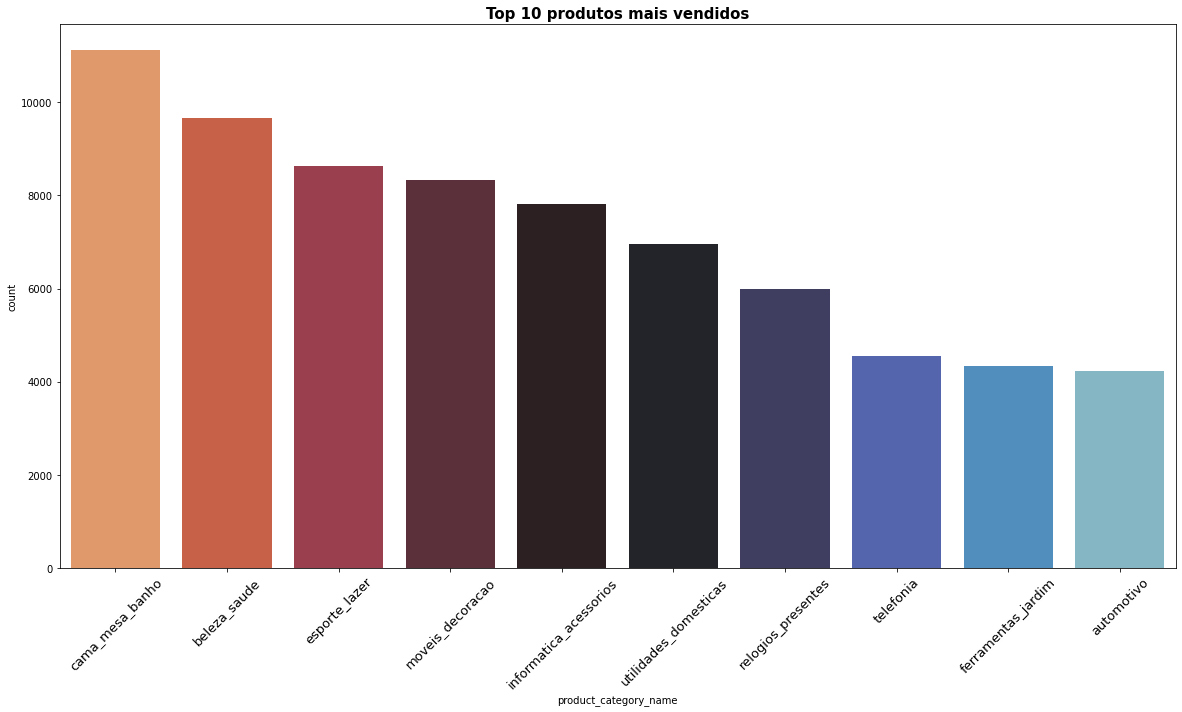

In [22]:
#Plotando os 10 produtos mais pedidos

plt.figure(figsize = (20,10))
g = sns.countplot(x='product_category_name',
              data=df_product_order,
                 order = df_product_order ['product_category_name'].value_counts()[:10].index,
                  palette='icefire_r'
                 )

g.set_title("Top 10 produtos mais vendidos", fontsize = 15, weight='bold')
g = plt.xticks(rotation=45,fontsize = 13)

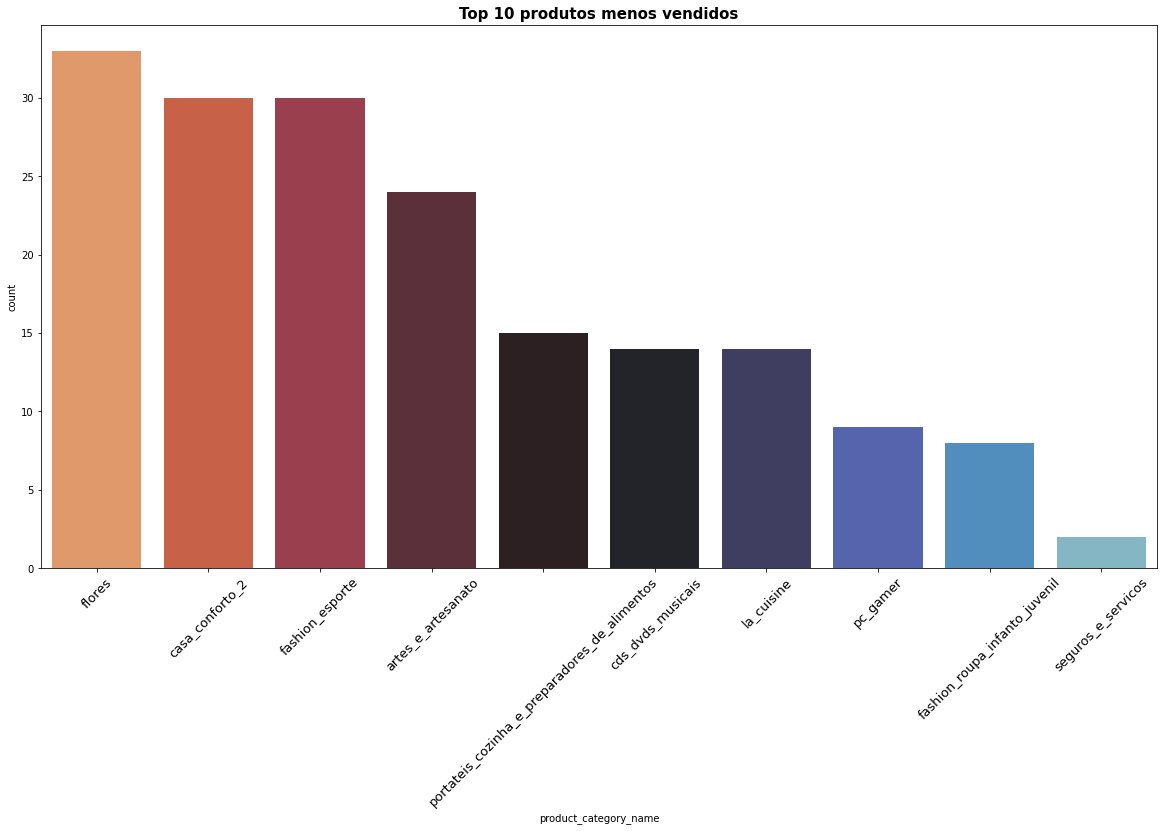

In [23]:
plt.figure(figsize = (20,10))
g = sns.countplot(x='product_category_name',
              data=df_product_order,
                 order = df_product_order ['product_category_name'].value_counts()[-10:].sort_values(ascending=False).index,
                  palette='icefire_r'
                 )

g.set_title("Top 10 produtos menos vendidos", fontsize = 15, weight='bold')
g = plt.xticks(rotation=45, fontsize = 13)

- Seguros e serviço é o produto menos vendido
- Seria interessante olhar se tem alguma relação entre as reclamações e os produtos que são pouco vendidos

In [24]:
len(df_product_order['product_id'].unique())

32951

## 1.2 - Customer (Clientes)

In [25]:
df_customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [26]:
# Total Clientes por estado
df_customer['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

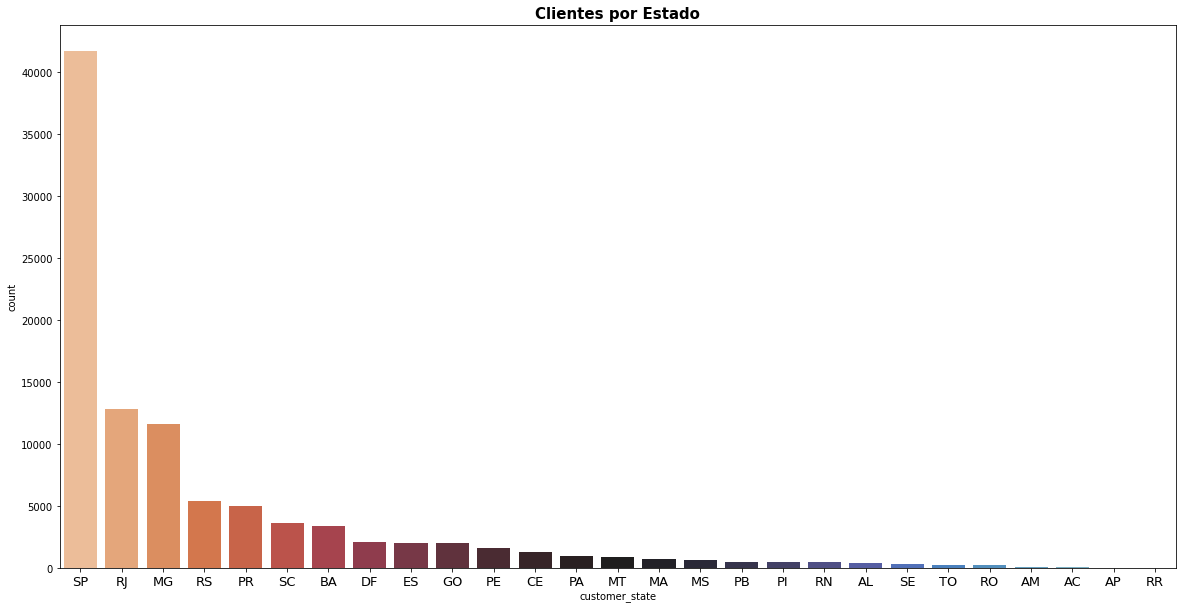

In [27]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='customer_state', 
                  data=df_customer,
                 order = df_customer['customer_state'].value_counts().index,
                 palette='icefire_r')
g.set_title("Clientes por Estado", fontsize = 15, weight='bold')
g = plt.xticks(fontsize = 13)

#### Análise por Cidade

In [28]:
total_cities = df_customer.groupby('customer_city')['customer_id'].count().sort_values(ascending=[False])[:15]

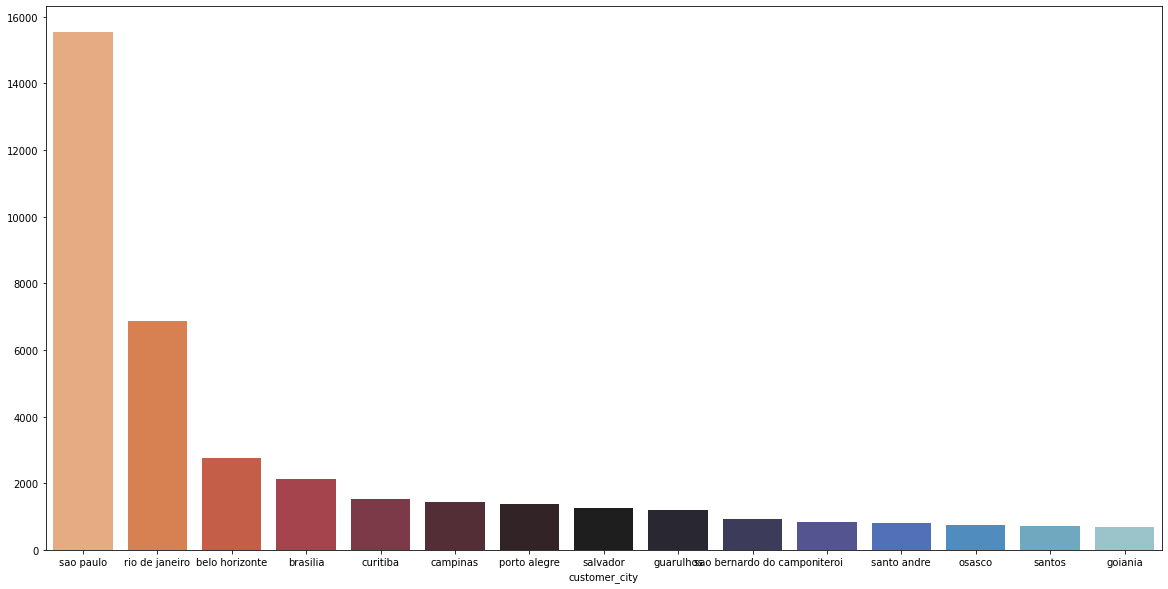

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x = total_cities.index,
            y = total_cities.values,
                palette='icefire_r')

## 1.3 - Geolocalização

In [30]:
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import folium
from folium.plugins import FastMarkerCluster

In [31]:
df_geolocation.head()

geolocation_zip_code_prefix  ...  geolocation_state
0                         1037  ...                 SP
1                         1046  ...                 SP
2                         1046  ...                 SP
3                         1041  ...                 SP
4                         1035  ...                 SP

[5 rows x 5 columns]

In [32]:
lats = list(df_geolocation['geolocation_lat'])
long = list(df_geolocation['geolocation_lng'])

In [33]:
locations = list(zip(lats,long))

In [34]:
mapa = folium.map(location=[-15, -50], zoom_start=4.0)

TypeError: ignored

In [ ]:
configure_plotly_browser_state()
df_geolocation['geolocation_lat']iplot

## 1.4 - Pedidos

In [ ]:
df_orders.head()

In [35]:
#Porcentagem de vendas por estado 
round((df_geolocation['geolocation_state'].value_counts()/len(df_geolocation['geolocation_state']))*100,2)

SP    40.42
MG    12.63
RJ    12.11
RS     6.18
PR     5.78
SC     3.83
BA     3.60
GO     2.01
ES     1.67
PE     1.64
DF     1.30
MT     1.20
CE     1.17
PA     1.09
MS     1.04
MA     0.79
PB     0.55
RN     0.50
PI     0.45
AL     0.42
TO     0.36
SE     0.36
RO     0.35
AM     0.24
AC     0.13
AP     0.09
RR     0.06
Name: geolocation_state, dtype: float64

In [36]:
#Status dos pedidos
#tive que rodar a função acima para executar o gráfico do plotly no colab
configure_plotly_browser_state()
df_orders['order_status'].value_counts().iplot(kind='bar')

a maioria dos pedidos foram entregues

In [37]:
df.head()

order_id  ... seller_state
0  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
1  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
2  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
3  128e10d95713541c87cd1a2e48201934  ...           SP
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...           SP

[5 rows x 39 columns]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

### Para responder quanto de pedidos por mês temos que primeiramente tratar a coluna data

In [39]:
df.head()

order_id  ... seller_state
0  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
1  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
2  e481f51cbdc54678b7cc49136f2d6af7  ...           SP
3  128e10d95713541c87cd1a2e48201934  ...           SP
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...           SP

[5 rows x 39 columns]

In [40]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [41]:
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)

In [42]:
df_orders.head()

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]

In [43]:
vendas_por_mes = df.groupby(by='order_purchase_month').price.sum()
#VIsualização do valor de vendas por mês
vendas_por_mes.head()

order_purchase_month
2016-09       267.36
2016-10     51068.92
2016-12        10.90
2017-01    129895.32
2017-02    262013.86
Name: price, dtype: float64

In [44]:
import plotly.offline as py
import plotly.graph_objs as go

In [45]:
configure_plotly_browser_state()
data_vendas_mes = [go.Bar(x=vendas_por_mes.index,
                          y=vendas_por_mes.values,
                          marker = {'color': 'lightblue',
                                    'line':{'color': '#333',
                                            'width': 2}})]

# Layout Gráfico

config_layout = go.Layout(title='Vendas no Periodo',
                          yaxis = {'title':'Valores em Vendas'},
                          xaxis={'title':'Periodo'})

#Objeto Figura

fig = go.Figure(data=data_vendas_mes, layout=config_layout)

#Plot grafico
py.iplot(fig)

# Valor do Frete x Valor do Produto

In [46]:
configure_plotly_browser_state()
trace = go.Scatter(x=df['freight_value'],
                   y=df['price'],
                   mode = 'markers')

#armazenando gráfico em lista
data=[trace]

#layout
layout = go.Layout(title='Valor do Frete x Valor do Produto',
                   yaxis={'title':'Valor do Produto'},
                   xaxis={'title':'Valor do Frete'})

#Criando a figura que será exibida
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [47]:
df.head()

order_id  ... order_purchase_month
0  e481f51cbdc54678b7cc49136f2d6af7  ...              2017-10
1  e481f51cbdc54678b7cc49136f2d6af7  ...              2017-10
2  e481f51cbdc54678b7cc49136f2d6af7  ...              2017-10
3  128e10d95713541c87cd1a2e48201934  ...              2017-08
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...              2017-08

[5 rows x 40 columns]